<img src="./images/title.png"/>




<img src="./images/prob_1/p1.png"/>

<img src="./images/prob_1/a.png"/>

Dual problem presented in problem 1 :

minimize   $12\pi_{1} + 8\pi_{2}$

subject to : 

$x_{1}: 4\pi_{1} + \pi_{2} \geq 1 \\
x_{2}: \pi_{1} + 2\pi_{2} \geq 2 \\
x_{3}: 3\pi_{1} - 2\pi_{2} \geq -8$

### Feasable region plot
<img src="./images/fig1.png" style="width:460px;"/>

Figure 1


### Feasable solutions
<img src="./images/fig2.png" style="width:460px;"/>

Figure 2


As we can see in Figure 2, all feasable solutions lie in the feasable region's edge $x_{2}: \pi_{1} + 2\pi_{2} = 2$. Such line segment has vertex $(0,1)$, which is optimal. It has parametric equations:

$(\pi_{1}^{*},\pi_{2}^{*}) = (0,1) + \lambda$



<img src="./images/prob_1/b.png"/>

#### Optimality condition 1: 
$\bf{x^{*}}$ is primal feasable as it satisfies the inequalities in the primal problem

#### Optimality condition 2:
$\bf{\pi^{*}}$ is dual feasable as it satisfies the inequalities in the dual problem

#### Optimality condition 3:
Complementary slackness:

$x_{3}: 3\pi_{1} - 2\pi_{2} \geq -8$ always holds

- therefore: $x_{3} = 0$

Then we have:

$4x_{1} + x_{2} = 12 \\
x_{1} + 2x_{2} = 8 \\
x_{1} \geq 0, x_{2} \geq 0$

Solving for $x_{1}$ and $x_{2}$:

$x_{2} = 12 - 4x_{1} \\
x_{1} - 8x_{1} + 24 = 8 \\
-7x_{1} = -16$

Which results in:

$x_{1} = \frac{16}{7} \\
x_{2} = \frac{20}{7}$

 - therefore ${\bf x^{*}} = (\frac{16}{7}, \frac{20}{7}, 0)$




### Solving the problem in Gurobi-Python

In [101]:
# importing libraries
import gurobipy as gp
from gurobipy import GRB

# setting up the optimization problem
m = 2  # number of resources
n = 3  # number of products

resources = range(m)  # list [1, ..., m]
products = range(n)  # list [1, ..., n]

# primal objective coefficients
r_coeff = [1, 2, -8]

# left-hand side (LHS) coefficients (matrix A)
A_coeff = [[4, 1, 3],
           [1, 2, -2]]

# right-hand side (RHS) coefficients
b_coeff = [12, 8]

r = {j: r_coeff[j] for j in products}
A = {i: {j: A_coeff[i][j] for j in products} for i in resources}
b = {i: b_coeff[i] for i in resources}

# naming the model
model = gp.Model('1d')
x = model.addVars(products, name="x")  # quantity produced

# Constraints
model.addConstrs((gp.quicksum(A[i][j] * x[j] for j in products)
                  == b[i]
                  for i in resources), name="pi")

# Objective
obj = gp.quicksum(r[j] * x[j] for j in products)
model.setObjective(obj, GRB.MAXIMIZE)
model.optimize()


Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0xd85cf6b9
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e+00, 8e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 1e+01]
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0000000e+30   2.750000e+30   3.000000e+00      0s
       3    8.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds
Optimal objective  8.000000000e+00


In [102]:
# Printing solution
# Variable information including sensitivity information
varnames = [f"x[{n+1}]" for n,x in enumerate(model.getVars())]
for var, v in zip(varnames,model.getVars()):
    print(f"{var} = {v.X}")

x[1] = 2.2857142857142856
x[2] = 2.857142857142857
x[3] = 0.0


<img src="./images/prob_1/c.png"/>

The reduced costs of the primal variables are computed as following:

$\bar{c_{1}} = 4\pi_{1}^{*} + \pi_{2}^{*} - 1 = 4\lambda + 1 - \frac{\lambda}{2} - 1 = \frac{7\lambda}{2}  \\
\bar{c_{2}} = \pi_{1}^{*} + 2\pi_{2}^{*} - 2 = \lambda + 2 - \lambda - 2 = 0 \\
\bar{c_{3}} = 3\pi_{1}^{*} - 2\pi_{2}^{*} + 8 = 3\lambda - 2 - \lambda + 8 = 2\lambda + 6$

Where $\bf{\pi^{*}}$ is a dual optimal solution
 - therefore, the reduced costs are not unique

<img src="./images/prob_1/d.png"/>

primal problem:

maximize $x_{1} + 2x_{2} - 8x_{3}$

subject to :

$4x_{1} + x_{2} + 3x_{3} = 12 \\
x_{1} + 2x_{2} - 2x_{3} = 8 \\
x_{1} \geq 0, x_{2} \geq 0, x_{3} \geq 0$

Let's consider $\bf{\pi^{*}} = (0,1)$ we have $x_{3} = 0$ and then:

$4x_{1} + x_{2} = 12 + \Delta b_{1} \\
x_{1} + 2x_{2} = 8 + \Delta b_{2}$

Solving we get:

$\hat{x}^{*} = (\frac{1}{7} (2\Delta b_{1} - \Delta b_{2} + 16), \frac{1}{7} (-\Delta b_{1} + 4\Delta b_{2} + 20), 0)$

Imposing primal feasability returns:

$2\Delta b_{1} - \Delta b_{2} \geq -16 \\
-\Delta b_{1} + 4\Delta b_{2} \geq -20$

As a result: if $\Delta b_{1} = 0$ then $\Delta b_{2} \in [-5, 16]$ and if $\Delta b_{2} = 0$ then $\Delta b_{1} \in [-8, 20]$



### Comparing with Gurobi-Python

In [103]:
[x.X for x in model.getVars()]

[2.2857142857142856, 2.857142857142857, 0.0]

In [104]:
# Changes in constraint RHS
constnames = [(f"pi[{n+1}]",diff) for n,(x,diff) in enumerate(zip(model.getConstrs(),[12,8]))] 
for (cname,diff),c in zip(constnames,model.getConstrs()):
    print(f"{cname} : from RHS = {c.SARHSLow-diff}, to RHS = {c.SARHSUp-diff}")

pi[1] : from RHS = -8.0, to RHS = 20.0
pi[2] : from RHS = -5.0, to RHS = 16.0


As we can see, te Gurobi-Python solution matches both the intervals resulting from the analytical process.

<img src="./images/prob_1/e.png"/>

The primal problem only has one feasable solution, so the optimal solution $\bf{x^{*}}$ remains optimal for the following modified problem:

maximize $(1 + \Delta r_{1})x_{1} + (2 + \Delta r_{2})x_{2} - (8 + \Delta r_{3})x_{3}$

subject to :

$4x_{1} + x_{2} + 3x_{3} = 12 \\
x_{1} + 2x_{2} - 2x_{3} = 8 \\
x_{1} \geq 0, x_{2} \geq 0, x_{3} \geq 0$

Following a standard analysis, we consider ${\bf\hat{x}^{*}} = (\frac{16}{7}, \frac{20}{7}, 0)$

By complementary slackness we formulate the following 2 systems of linear equations:

#### system 1:

$4\pi_{1} + \pi_{2} = 1 + \Delta r_{1} \\
\pi_{1} + 2\pi_{2} = 2 + \Delta r_{2}$

resulting in: 

$\hat{\pi}^{*} = (\frac{1}{7} (2\Delta r_{1} - \Delta r_{2}), \frac{1}{7} (7 - \Delta r_{1} + 4\Delta b_{2}))$

Dual feasability means that:


$3\hat{\pi}^{*}_{1} + 2\hat{\pi}^{*}_{2} + 8 - \Delta r_{3} = \frac{1}{7} (42 + 8\Delta r_{1} - 11\Delta r_{2} - 7\Delta r_{3})$

and:

$8\Delta r_{1} - 11\Delta r_{2} - 7\Delta r_{3} \geq -42$

So, if:

$\Delta r_{1} = 0, \Delta r_{2} = 0$, then $\Delta r_{3} \leq 6$

$\Delta r_{1} = 0, \Delta r_{3} = 0$, then $\Delta r_{2} \leq \frac{42}{11}$

$\Delta r_{2} = 0, \Delta r_{3} = 0$, then $\Delta r_{1} \geq \frac{-21}{4}$

#### system 2:

$\pi_{1} + 2\pi_{2} = 2 + \Delta r_{2} \\
3\pi_{1} - 2\pi_{2} = -8 + \Delta r_{3}$

resulting in: 

$\hat{\pi}^{*} = (\frac{1}{4} (- 14 - 3\Delta r_{2} + \Delta r_{3}), \frac{1}{4} (- 20 -2\frac{1}{2}\Delta r_{2} + 2\frac{1}{2}\Delta r_{3}))$

Dual feasability means that:


$4\hat{\pi}^{*}_{1} + \hat{\pi}^{*}_{2} -1 - \Delta r_{1} = \frac{1}{4} (- 98 - 4\Delta r_{1} - 11\Delta r_{2} + 9\Delta r_{3})$

and:

$-4\Delta r_{1} - 11\Delta r_{2} + 9\Delta r_{3} \geq 98$

So, if:

$\Delta r_{1} = 0, \Delta r_{2} = 0$, then $\Delta r_{3} \geq \frac{98}{9}$

$\Delta r_{1} = 0, \Delta r_{3} = 0$, then $\Delta r_{2} \leq \frac{98}{11}$

$\Delta r_{2} = 0, \Delta r_{3} = 0$, then $\Delta r_{1} \leq \frac{-49}{2}$

Combining both cases we obtain that $\bf x^{*}$ is optimal for any $\Delta r_{j} \in \mathbb{R}$

### Comparing with Gurobi-Python

In [100]:
# Changes of objective coefficients for the primal problem
varnames = [(f"pi[{n+1}]",diff) for n,(x,diff) in enumerate(zip(model.getVars(),[1,2,-8]))]
for (var,diff), v in zip(varnames,model.getVars()):
    print(f"{var} : from coeff = {v.SAObjLow - diff}, to coeff = {v.SAObjUp - diff}")

pi[1] : from coeff = -5.25, to coeff = inf
pi[2] : from coeff = -inf, to coeff = 3.8181818181818183
pi[3] : from coeff = -inf, to coeff = 6.0


As we can see, the Gurobi-Python solution matches the first 3 differences 

<img src="./images/prob_2/p2.png"/>

<img src="./images/prob_2/a.png"/>

The primal LO formulation for LR with MAE criterion as seen in class has the following parameters:

- Objective: minimize $\sum_{i=1}^{n} (e_{i}^{+} + e_{i}^{-})$

- Subject to the following constraints: 
    - $(e_{i}^{+} - e_{i}^{-}) + b_{0} + x_{i1} b_{1} + \dots + x_{im} b_{m} = y_{i}$ $i = 1, \dots, n$

    - $e_{i}^{+}, e_{i}^{-} \geq 0,$ $i = 1, \dots, n$

### Gurobi implementation of the problem

In [127]:
# importing libraries
import gurobipy as gp
from gurobipy import GRB

In [128]:
# creating multidict with observations
observations, x, y = gp.multidict({
    ('1'): [30.1,176.2],
    ('2'): [29.5,176.8],
    ('3'): [30.4,184.2],
    ('4'): [31.6,173.2],
    ('5'): [27.4,172.8],
    ('6'): [28.3,174.1],
    ('7'): [33.4,180.5],
})

In [129]:
model = gp.Model('CurveFitting')

# Constant term of the function f(x). This is a free continuous variable that can take positive and negative values. 
a = model.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="a")

# Coefficient of the linear term of the function f(x). This is a free continuous variable that can take positive 
# and negative values.
b = model.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="b")

# Non-negative continuous variables that capture the positive deviations
e_plus = model.addVars(observations, vtype=GRB.CONTINUOUS, name="e_plus")

# Non-negative continuous variables that capture the negative deviations
e_neg = model.addVars(observations, vtype=GRB.CONTINUOUS, name="e_neg")

# Non-negative continuous variables that capture the value of the maximum deviation
z = model.addVar(vtype=GRB.CONTINUOUS, name="z")

In [130]:
# Deviation constraints

deviations = model.addConstrs( (b*x[i] + a + e_plus[i] - e_neg[i] == y[i] for i in observations), name='deviations')

# Objective function of problem 1

model.setObjective(e_plus.sum('*') + e_neg.sum('*'))

# Verify model formulation

model.write('CurveFitting.lp')

# Run optimization engine

model.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 7 rows, 17 columns and 28 nonzeros
Model fingerprint: 0xc72524f5
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 2e+02]
Presolve removed 0 rows and 1 columns
Presolve time: 0.04s
Presolved: 7 rows, 16 columns, 28 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
       7    1.4029412e+01   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.04 seconds
Optimal objective  1.402941176e+01


In [131]:
# The best straight line that minimizes the absolute value of the deviations is:
print(f"y = {b.x:.4f}x + ({a.x:.4f})")

y = 1.2549x + (138.5863)


In [132]:
for n,v in enumerate(model.getVars()):
    print(f"{v.Varname} = {v.X}, reduced cost = {abs(v.RC):.2f}, from coeff = {v.SAObjLow:.2f}, to coeff = {v.SAObjUp:.2f}")

a = 138.58627450980384, reduced cost = 0.00, from coeff = -0.15, to coeff = 0.03
b = 1.2549019607843164, reduced cost = 0.00, from coeff = -0.90, to coeff = 4.20
e_plus[1] = 0.0, reduced cost = 2.00, from coeff = -1.00, to coeff = inf
e_plus[2] = 1.1941176470588317, reduced cost = 0.00, from coeff = 0.77, to coeff = 3.38
e_plus[3] = 7.464705882352931, reduced cost = 0.00, from coeff = 0.70, to coeff = 3.86
e_plus[4] = 0.0, reduced cost = 2.00, from coeff = -1.00, to coeff = inf
e_plus[5] = 0.0, reduced cost = 2.00, from coeff = -1.00, to coeff = inf
e_plus[6] = 0.0, reduced cost = 0.18, from coeff = 0.82, to coeff = inf
e_plus[7] = 0.0, reduced cost = 0.82, from coeff = 0.18, to coeff = inf
e_neg[1] = 0.15882352941177658, reduced cost = 0.00, from coeff = -1.00, to coeff = 1.27
e_neg[2] = 0.0, reduced cost = 2.00, from coeff = -1.00, to coeff = inf
e_neg[3] = 0.0, reduced cost = 2.00, from coeff = -1.00, to coeff = inf
e_neg[4] = 5.041176470588255, reduced cost = 0.00, from coeff = -0.

In [136]:
# Optimal shadow prices
for n,c in enumerate(model.getConstrs()):
    print(f"{c.ConstrName} : shadow price = {c.Pi}, from RHS = {c.SARHSLow}, to RHS = {c.SARHSUp:.2f}")

deviations[1] : shadow price = -1.0, from RHS = -inf, to RHS = 176.36
deviations[2] : shadow price = 1.0, from RHS = 175.6058823529412, to RHS = inf
deviations[3] : shadow price = 1.0, from RHS = 176.73529411764707, to RHS = inf
deviations[4] : shadow price = -1.0, from RHS = -inf, to RHS = 178.24
deviations[5] : shadow price = -1.0, from RHS = -inf, to RHS = 172.97
deviations[6] : shadow price = 0.8235294117647058, from RHS = 173.955, to RHS = 175.66
deviations[7] : shadow price = 0.17647058823529418, from RHS = 180.04999999999995, to RHS = 181.47


<img src="./images/prob_2/b.png"/>

The prediction equation (representing the optimal solution) resulting from the implementation is $\hat{y} = 1.2549x + 138.5863$. 

In this case, the variables that have to take the value zero in any optimal solution because they have positive reduced costs are:

$e_{1}^{+} = e_{4}^{+} = e_{5}^{+} = e_{6}^{+} = e_{7}^{+} = e_{2}^{-} = e_{3}^{-} = e_{6}^{-} = e_{7}^{-} = 0$ 

We thus have the following system of equations that characterizes the optimal solutions:

$-e_{1}^{-} + b_{0} + x_{1}b_{1} = y_{1} \\
e_{2}^{+} + b_{0} + x_{2}b_{1} = y_{2} \\
e_{3}^{+} + b_{0} + x_{3}b_{1} = y_{3} \\
-e_{4}^{-} + b_{0} + x_{4}b_{1} = y_{4} \\
-e_{5}^{-} + b_{0} + x_{5}b_{1} = y_{5} \\
b_{0} + x_{6}b_{1} = y_{6} \\
b_{0} + x_{7}b_{1} = y_{7} \\
$

Given that this system has a unique solution, then there is a unique optimal solution.

<img src="./images/prob_2/c.png"/>

The dual problem is

(D) maximize $d = \sum_{i=1}^{n} y_{i} \pi_{i}$

subject to:

$b_{0}: \sum_{i=1}^{n} \pi_{i} = 0 \\
b_{1}: \sum_{i=1}^{n} x_{i} \pi_{i} = 0 \\
e_{i}^{+}: \pi_{i} \leq 1, i = 1, \dots, n \\
e_{i}^{-}: -\pi_{i} \leq 1, i = 1, \dots, n $

by strong duality, we write the MAE as $z^{*}({\bf y})$, so then we have

$\pi_{1}^{*} = \frac{\partial}{\partial y_{i}} z^{*}({\bf y})$,

whenever the derivative exists. 

therefore we have the following optimal dual solution:

$\pi_{1}^{*} = -1 \\
\pi_{2}^{*} = 1 \\
\pi_{3}^{*} = 1 \\
\pi_{4}^{*} = -1 \\
\pi_{5}^{*} = -1 \\
\pi_{6}^{*} = 0.8235 \\
\pi_{7}^{*} = 0.1764$

We can see that every time the prediction equation underestimates the response (meaning $e_{i}^{+}>0$), our solution for such $\pi_{i}^{*}$ will be 1. For the opposite case, when it overestimates the response (meaning $e_{i}^{-} > 0)$, our solution for such $\pi_{i}^{*}$ will be -1.


In [138]:
# Optimal shadow prices
for n,c in enumerate(model.getConstrs()):
    print(f"{c.ConstrName} : shadow price = {c.Pi}, from RHS = {c.SARHSLow}, to RHS = {c.SARHSUp:.2f}")    
    if c.Pi == float(-1):
        print("Prediction equation overestimates the response\n")
    elif c.Pi == float(1):
        print("Prediction equation underestimates the response\n")
    else:
        print("Response is within range\n")

deviations[1] : shadow price = -1.0, from RHS = -inf, to RHS = 176.36
Prediction equation overestimates the response

deviations[2] : shadow price = 1.0, from RHS = 175.6058823529412, to RHS = inf
Prediction equation underestimates the response

deviations[3] : shadow price = 1.0, from RHS = 176.73529411764707, to RHS = inf
Prediction equation underestimates the response

deviations[4] : shadow price = -1.0, from RHS = -inf, to RHS = 178.24
Prediction equation overestimates the response

deviations[5] : shadow price = -1.0, from RHS = -inf, to RHS = 172.97
Prediction equation overestimates the response

deviations[6] : shadow price = 0.8235294117647058, from RHS = 173.955, to RHS = 175.66
Response is within range

deviations[7] : shadow price = 0.17647058823529418, from RHS = 180.04999999999995, to RHS = 181.47
Response is within range



<img src="./images/prob_3/p3.png"/>

<img src="./images/prob_3/a.png"/>

In [41]:
# importing libraries
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB


In [42]:
# Parameters

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]

oils = ["VEG1", "VEG2", "OIL1", "OIL2", "OIL3"]

cost = {
    ('Jan', 'VEG1'): 110,
    ('Jan', 'VEG2'): 120,
    ('Jan', 'OIL1'): 130,
    ('Jan', 'OIL2'): 110,
    ('Jan', 'OIL3'): 115,
    ('Feb', 'VEG1'): 130,
    ('Feb', 'VEG2'): 130,
    ('Feb', 'OIL1'): 110,
    ('Feb', 'OIL2'): 90,
    ('Feb', 'OIL3'): 115,
    ('Mar', 'VEG1'): 110,
    ('Mar', 'VEG2'): 140,
    ('Mar', 'OIL1'): 130,
    ('Mar', 'OIL2'): 100,
    ('Mar', 'OIL3'): 95,
    ('Apr', 'VEG1'): 120,
    ('Apr', 'VEG2'): 110,
    ('Apr', 'OIL1'): 120,
    ('Apr', 'OIL2'): 120,
    ('Apr', 'OIL3'): 125,
    ('May', 'VEG1'): 100,
    ('May', 'VEG2'): 120,
    ('May', 'OIL1'): 150,
    ('May', 'OIL2'): 110,
    ('May', 'OIL3'): 105,
    ('Jun', 'VEG1'): 90,
    ('Jun', 'VEG2'): 100,
    ('Jun', 'OIL1'): 140,
    ('Jun', 'OIL2'): 80,
    ('Jun', 'OIL3'): 135
}


hardness = {"VEG1": 8.8, "VEG2": 6.1, "OIL1": 2.0, "OIL2": 4.2, "OIL3": 5.0}

price = 150
init_store = 500
target_store = 500
veg_cap = 200
oil_cap = 250

min_hardness = 3
max_hardness = 6
holding_cost = 5

In [43]:
# Model deployment

food = gp.Model('Food Manufacture I')
# Quantity of food produced in each period
produce = food.addVars(months, name="Produce")
# Quantity bought of each product in each period
buy = food.addVars(months, oils, name = "Buy")
# Quantity used of each product  in each period
consume = food.addVars(months, oils, name = "Use")
# Quantity stored of each product  in each period
store = food.addVars(months, oils, name = "Store")



In [44]:
#1. Initial Balance
Balance0 = food.addConstrs((init_store + buy[months[0], oil]
                 == consume[months[0], oil] + store[months[0], oil]
                 for oil in oils), "Initial_Balance")

#2. Balance
Balance = food.addConstrs((store[months[months.index(month)-1], oil] + buy[month, oil]
                 == consume[month, oil] + store[month, oil]
                 for oil in oils for month in months if month != month[0]), "Balance")

#3. Inventory Target
TargetInv = food.addConstrs((store[months[-1], oil] == target_store for oil in oils),"End_Balance")

#4.1 Vegetable Oil Capacity
VegCapacity = food.addConstrs((gp.quicksum(consume[month, oil] for oil in oils if "VEG" in oil)
                 <= veg_cap for month in months), "Capacity_Veg")

#4.2 Non-vegetable Oil Capacity
NonVegCapacity = food.addConstrs((gp.quicksum(consume[month, oil] for oil in oils if "OIL" in oil)
                 <= oil_cap for month in months), "Capacity_Oil")

#5. Hardness
HardnessMin = food.addConstrs((gp.quicksum(hardness[oil]*consume[month, oil] for oil in oils)
                 >= min_hardness*produce[month] for month in months), "Hardness_lower")
HardnessMax = food.addConstrs((gp.quicksum(hardness[oil]*consume[month, oil] for oil in oils)
                 <= max_hardness*produce[month] for month in months), "Hardness_upper")

#6. Mass Conservation
MassConservation = food.addConstrs((consume.sum(month) == produce[month] for month in months), "Mass_conservation")

#0. Objective Function
obj = price*produce.sum() - buy.prod(cost) - holding_cost*store.sum()
food.setObjective(obj, GRB.MAXIMIZE) # maximize profit

In [45]:
food.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 70 rows, 96 columns and 278 nonzeros
Model fingerprint: 0xd588eb19
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [5e+00, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 5e+02]
Presolve removed 33 rows and 45 columns
Presolve time: 0.00s
Presolved: 37 rows, 51 columns, 149 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.7375000e+05   1.703125e+03   0.000000e+00      0s
      32    1.0784259e+05   0.000000e+00   0.000000e+00      0s

Solved in 32 iterations and 0.00 seconds
Optimal objective  1.078425926e+05


In [23]:
# Variable information including sensitivity information
for n,v in enumerate(food.getVars()):
    if n>1 and food.getVars()[n-1].Varname[0:3] != v.Varname[0:3]:
        print('----------------------------------------------')
    print(f"{v.Varname} = {v.X}, reduced cost = {abs(v.RC):.2f}, from coeff = {v.SAObjLow:.2f}, to coeff = {v.SAObjUp:.2f}")
    



Produce[Jan] = 450.0, reduced cost = 0.00, from coeff = 65.00, to coeff = inf
Produce[Feb] = 450.0, reduced cost = 0.00, from coeff = 75.00, to coeff = inf
Produce[Mar] = 450.0, reduced cost = 0.00, from coeff = 85.00, to coeff = inf
Produce[Apr] = 450.0, reduced cost = 0.00, from coeff = 95.00, to coeff = inf
Produce[May] = 450.0, reduced cost = 0.00, from coeff = 105.00, to coeff = inf
Produce[Jun] = 450.0, reduced cost = 0.00, from coeff = 100.37, to coeff = inf
----------------------------------------------
Buy[Jan,VEG1] = 0.0, reduced cost = 60.00, from coeff = -inf, to coeff = -50.00
Buy[Jan,VEG2] = 0.0, reduced cost = 70.00, from coeff = -inf, to coeff = -50.00
Buy[Jan,OIL1] = 0.0, reduced cost = 65.00, from coeff = -inf, to coeff = -65.00
Buy[Jan,OIL2] = 0.0, reduced cost = 45.00, from coeff = -inf, to coeff = -65.00
Buy[Jan,OIL3] = 0.0, reduced cost = 50.00, from coeff = -inf, to coeff = -65.00
Buy[Feb,VEG1] = 0.0, reduced cost = 70.00, from coeff = -inf, to coeff = -60.00
Buy

In [7]:
# Optimal objective value
print(f"{food.objVal:.3f}")

107842.593


In [8]:
# Optimal shadow prices
for n,c in enumerate(food.getConstrs()):
    if n>1 and food.getConstrs()[n-1].ConstrName[0:3] != c.ConstrName[0:3]:
        print('----------------------------------------------')
    print(f"{c.ConstrName} : shadow price = {c.Pi}, from RHS = {c.SARHSLow}, to RHS = {c.SARHSUp:.2f}")

Initial_Balance[VEG1] : shadow price = 0.0, from RHS = -500.0, to RHS = -500.00
Initial_Balance[VEG2] : shadow price = 0.0, from RHS = -500.0, to RHS = -500.00
Initial_Balance[OIL1] : shadow price = 0.0, from RHS = -500.0, to RHS = -500.00
Initial_Balance[OIL2] : shadow price = 0.0, from RHS = -500.0, to RHS = -500.00
Initial_Balance[OIL3] : shadow price = 0.0, from RHS = -500.0, to RHS = -500.00
----------------------------------------------
Balance[VEG1,Jan] : shadow price = -75.0, from RHS = 0.0, to RHS = 0.00
Balance[VEG1,Feb] : shadow price = -80.0, from RHS = -62.96296296296294, to RHS = 0.00
Balance[VEG1,Mar] : shadow price = -85.0, from RHS = -62.96296296296294, to RHS = 0.00
Balance[VEG1,Apr] : shadow price = -90.0, from RHS = -62.96296296296294, to RHS = 0.00
Balance[VEG1,May] : shadow price = -95.0, from RHS = -62.96296296296294, to RHS = 0.00
Balance[VEG1,Jun] : shadow price = -90.0, from RHS = -659.2592592592592, to RHS = inf
Balance[VEG2,Jan] : shadow price = -75.0, from 

<img src="./images/prob_3/b.png"/>

First of all let's order the results from the optimization in tables

In [9]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 5e+02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -9.1057407e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective -9.105740741e+04
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 140 rows, 96 columns and 556 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [3e+01, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 5e+02]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -8.8357407e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective -8.835740741e+04
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 140 rows, 96 columns and 556 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [3e+01, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS 

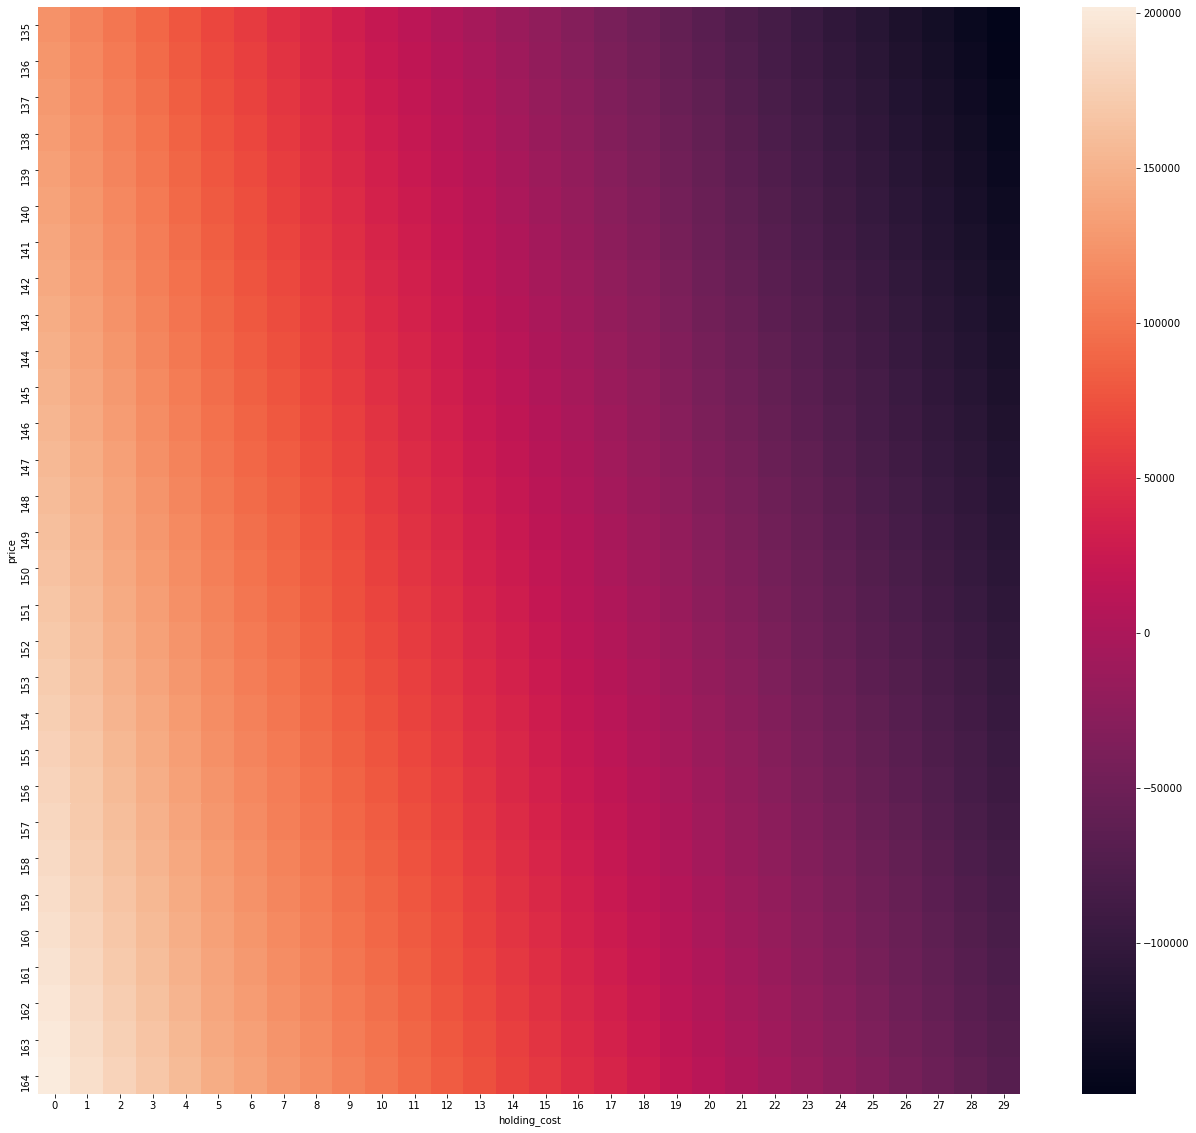

In [55]:
objectives = {'holding_cost':[],'price':[],'obj':[]}
for i in range(0,30):
    for j in range(135,165):
        holding_cost = i
        price = j

        #0. Objective Function
        obj = price*produce.sum() - buy.prod(cost) - holding_cost*store.sum()
        food.setObjective(obj, GRB.MAXIMIZE) # maximize profit
        
        food.optimize()

        # appending
        objectives['holding_cost'].append(i)
        objectives['price'].append(j)
        objectives['obj'].append(food.ObjVal)



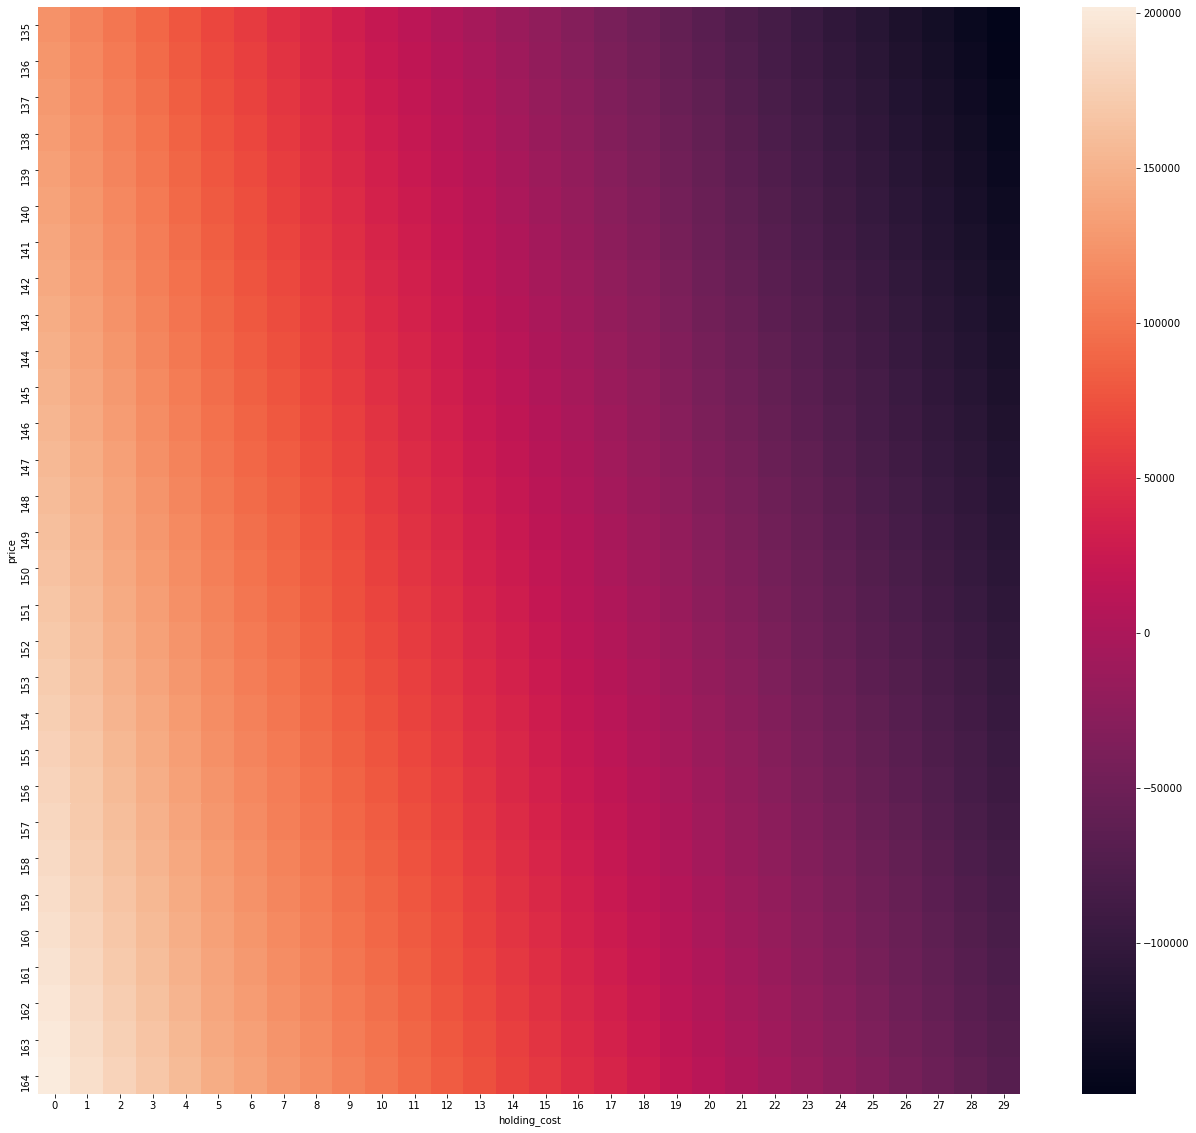

In [94]:
# plotting heatmap for objective coefficient changes
fig = plt.figure(figsize=(22,20))
hm = sns.heatmap(pd.DataFrame(objectives).pivot(columns='holding_cost', index='price', values='obj'))

Figure 3

expl: as we can see in figure 3...

<img src="./images/prob_3/c.png"/>

In [90]:
test_params = {
    'init_store': range(400, 600, 5),
    'target_store': range(400, 600, 5),
    'veg_cap': range(100, 300, 5),
    'oil_cap': range(150, 350, 5),
    'min_hardness': range(1, 41),
    'max_hardness': range(1, 41)
}

holding_cost = 5
price = 150


def loop_RHS(**params):
    default_params = {
        'init_store_b': (True, 500),
        'target_store_b': (True, 500),
        'veg_cap_b': (True, 200),
        'oil_cap_b': (True, 250),
        'min_hardness_b': (True, 3),
        'max_hardness_b': (True, 6)
    }

    # dict for obj values per RHS change
    obj_changes = {param: [] for param in params.keys()}

    for param, options in params.items():

        dp = {k: v for k, v in default_params.items() if k != f'{param}_b'}
        dp[f'{param}_b'] = (False, 0)

        for option in options:
            # Model deployment
            food = gp.Model('Food Manufacture I')
            # Quantity of food produced in each period
            produce = food.addVars(months, name="Produce")
            # Quantity bought of each product in each period
            buy = food.addVars(months, oils, name="Buy")
            # Quantity used of each product  in each period
            consume = food.addVars(months, oils, name="Use")
            # Quantity stored of each product  in each period
            store = food.addVars(months, oils, name="Store")

            if param == 'init_store':
                # 1. Initial Balance
                Balance0 = food.addConstrs((option + buy[months[0], oil]
                                            == consume[months[0], oil] + store[months[0], oil]
                                            for oil in oils), "Initial_Balance")
            elif param == 'target_store':
                # 3. Inventory Target
                TargetInv = food.addConstrs(
                    (store[months[-1], oil] == option for oil in oils), "End_Balance")
            elif param == 'veg_cap':
                # 4.1 Vegetable Oil Capacity
                VegCapacity = food.addConstrs((gp.quicksum(
                    consume[month, oil] for oil in oils if "VEG" in oil) <= option for month in months), "Capacity_Veg")
            elif param == 'oil_cap':
                # 4.2 Non-vegetable Oil Capacity
                NonVegCapacity = food.addConstrs((gp.quicksum(
                    consume[month, oil] for oil in oils if "OIL" in oil) <= option for month in months), "Capacity_Oil")
            elif param == 'min_hardness':
                # 5.1 Min Hardness
                HardnessMin = food.addConstrs((gp.quicksum(
                    hardness[oil]*consume[month, oil] for oil in oils) >= option*produce[month] for month in months), "Hardness_lower")
            else:
                # 5.2 Max Hardness
                HardnessMax = food.addConstrs((gp.quicksum(
                    hardness[oil]*consume[month, oil] for oil in oils) <= option*produce[month] for month in months), "Hardness_upper")

            if dp['init_store_b'][0] == True:
                Balance0 = food.addConstrs((dp['init_store_b'][1] + buy[months[0], oil]
                                            == consume[months[0], oil] + store[months[0], oil]
                                            for oil in oils), "Initial_Balance")
            Balance = food.addConstrs((store[months[months.index(month)-1], oil] + buy[month, oil]
                                       == consume[month, oil] + store[month, oil]
                                       for oil in oils for month in months if month != month[0]), "Balance")
            if dp['target_store_b'][0] == True:
                TargetInv = food.addConstrs(
                    (store[months[-1], oil] == dp['target_store_b'][1] for oil in oils), "End_Balance")
            if dp['veg_cap_b'][0] == True:
                VegCapacity = food.addConstrs((gp.quicksum(consume[month, oil] for oil in oils if "VEG" in oil)
                                               <= dp['veg_cap_b'][1] for month in months), "Capacity_Veg")
            if dp['oil_cap_b'][0] == True:
                NonVegCapacity = food.addConstrs((gp.quicksum(consume[month, oil] for oil in oils if "OIL" in oil)
                                                  <= dp['oil_cap_b'][1] for month in months), "Capacity_Oil")
            if dp['min_hardness_b'][0] == True:
                HardnessMin = food.addConstrs((gp.quicksum(hardness[oil]*consume[month, oil] for oil in oils)
                                               >= dp['min_hardness_b'][1]*produce[month] for month in months), "Hardness_lower")
            if dp['max_hardness_b'][0] == True:
                HardnessMax = food.addConstrs((gp.quicksum(hardness[oil]*consume[month, oil] for oil in oils)
                                               <= dp['max_hardness_b'][1]*produce[month] for month in months), "Hardness_upper")
            MassConservation = food.addConstrs(
                (consume.sum(month) == produce[month] for month in months), "Mass_conservation")
            obj = price*produce.sum() - buy.prod(cost) - holding_cost*store.sum()
            food.setObjective(obj, GRB.MAXIMIZE)  # maximize profit
            food.optimize()
            try:
                obj_changes[param].append(food.ObjVal)
            except:
                obj_changes[param].append(0)

    return obj_changes


obj_changes = loop_RHS(**test_params)


l Inf.      Time
       0    3.7375000e+05   1.593851e+03   0.000000e+00      0s
      33    1.0825000e+05   0.000000e+00   0.000000e+00      0s

Solved in 33 iterations and 0.01 seconds
Optimal objective  1.082500000e+05
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 70 rows, 96 columns and 278 nonzeros
Model fingerprint: 0xede0dd34
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [5e+00, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 5e+02]
Presolve removed 39 rows and 45 columns
Presolve time: 0.00s
Presolved: 31 rows, 51 columns, 119 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.7375000e+05   1.593851e+03   0.000000e+00      0s
      33    1.0825000e+05   0.000000e+00   0.000000e+00      0s

Solved in 33 iterations and 0.00 seconds
Optimal objective  1.082500000e+05
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 70 rows, 96 colum

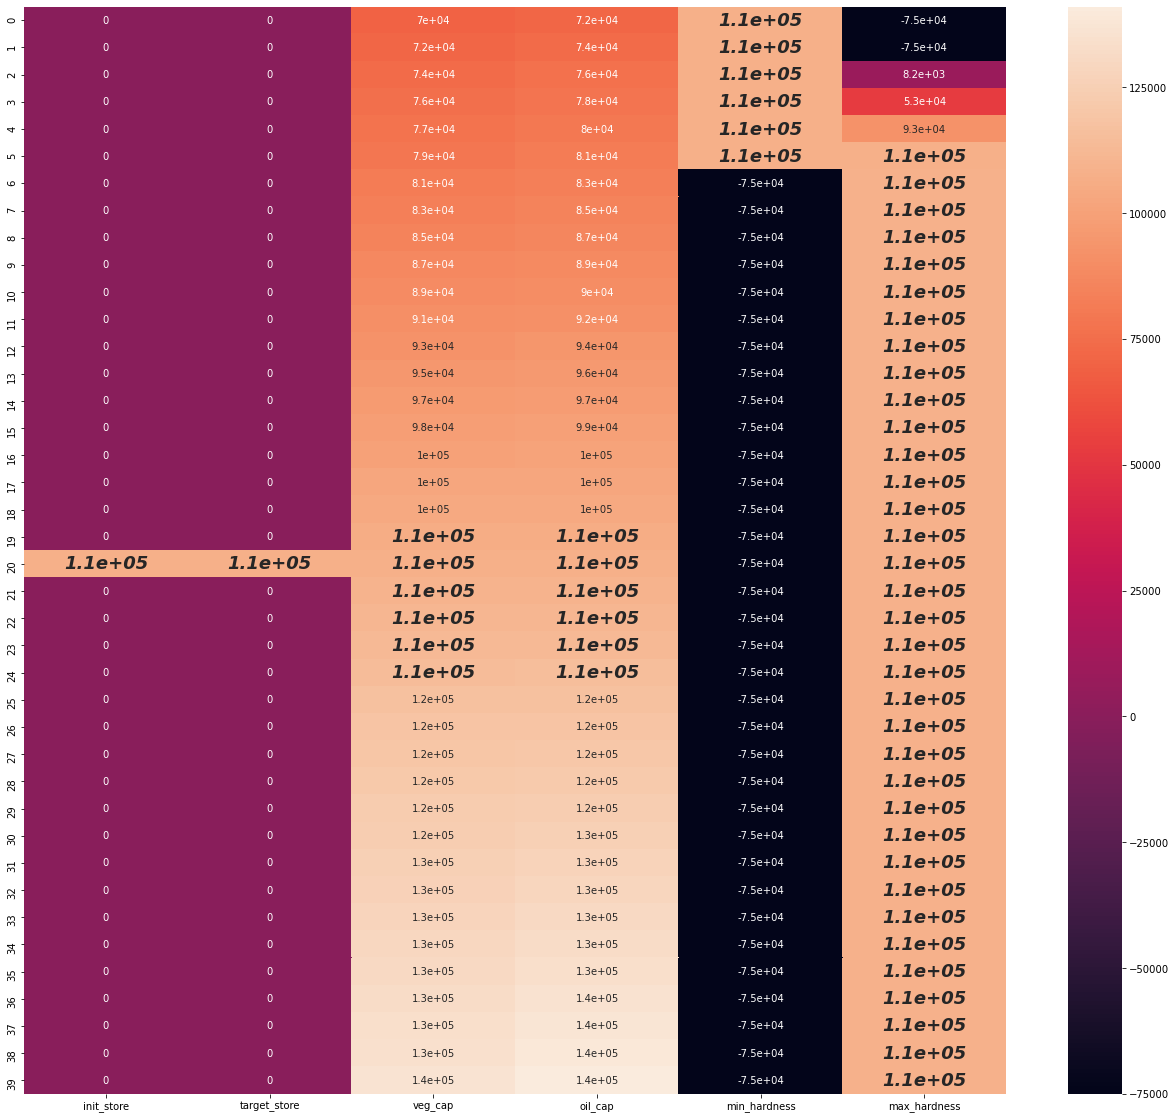

In [99]:
# plotting heatmap for objective coefficient changes
fig = plt.figure(figsize=(22,20))
ax = sns.heatmap(pd.DataFrame(obj_changes), annot=True)
for text in ax.texts:
    if text.get_text() == '1.1e+05':
        text.set_size(18)
        text.set_weight('bold')
        text.set_style('italic')